<a href="https://colab.research.google.com/github/sharonmar/data-augmentation/blob/main/DATA_ARGUMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Argumentation** 



A common problem, is the amount of data available to enter the models, for models to present the expected results it is necessary for training to occur with a large amount of data (dataset), but in many cases the data needed to perform these tasks is not available. This is where the Data Augmentation technique comes in that, as the name suggests, allows us to augment our dataset in two ways:

Introducing disturbances in the original data. For example: taking an original image centered, we replicate it off-center, reversing axes…
Using different distributions. Example: if we want to train a model to classify high-resolution images, we add low-resolution images, with noise… always maintaining the highest high-resolution ratio.


At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.


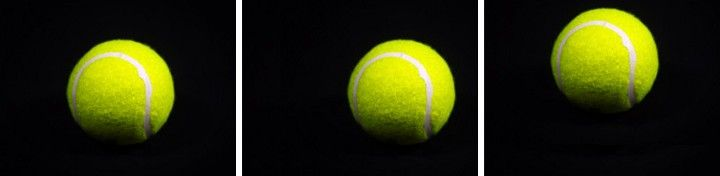

The same ball with some translations.



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1.   Turn around (Flip)
2.   Rotation

1.   Scale
2.   Cutout

1.   Traslation
2.   Gaussian noise


The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



*   The changes in the image (translations) through the arguments **width_shift_range** y **height_shift_range**.
*  Turning the image around using the arguments **horizontal_flip** y **vertical_flip**.
*   Image rotations through storyline **rotation_range**
*   Image brightness using the argument **brightness_range**.
*   Image zoom using the argument **zoom_range**.
*    for whitening with ZCA
 **zca_epsilon** and **zca_whitening**
*    Shear Intensity  **shear_range**
*    rescaling factor **rescale**
 


Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.

In [ ]:
import matplotlib.pyplot as plt    #Library that allows graphing, very MATLAB style
import numpy as np                  #Library that allows working with arrangement  
from numpy import expand_dims       #Expand the array shape 
from keras.preprocessing.image import load_img    #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from PIL import Image #libreria de imagenes de python
from urllib.request import urlopen #Permite leer una direccion electronica

First we upload an image from the internet

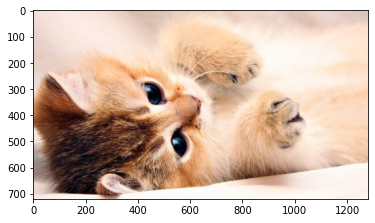

In [ ]:
url = 'https://i.ytimg.com/vi/ByRSxAqArzQ/maxresdefault.jpg' 
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.

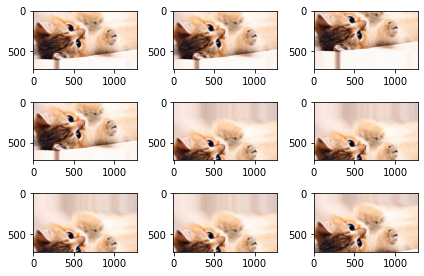

In [ ]:
# We convert the image to an arrangement
data = img_to_array (img)
# we expand to a sample
samples = expand_dims (data, 0)
# We create the data augmenter using only image change
datagen = ImageDataGenerator (height_shift_range = [- 100,200])
# we prepare the iterator
it = datagen.flow (samples, batch_size = 1)
# we generate samples and display the results
for i in range(9):
  plt.subplot(330 + 1 + i)
  # batches of images are generated
  batch = it.next ()
  image = batch[0].astype('uint8') # is converted to a valid value to be able to display it as an image
  plt.imshow (image)
  plt.tight_layout ()
plt.show ()

An image flip means to reverse the rows or columns of pixels in the case of a vertical or horizontal flip, respectively.
The magnification is specified by a Boolean argument **horizontal_flip** or **vertical_flip** for the **ImageDataGenerator** class.

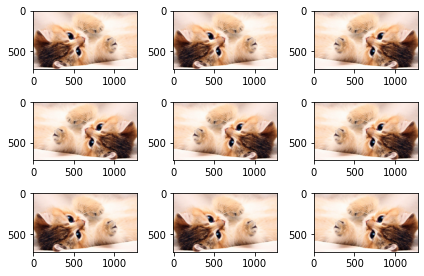

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is sampled uniformly at random from the zoom region for each dimension (width, height) separately.

Floating or [lower limit, upper limit]. Range for random zoom. If it is a float, [lower bound, upper bound] = [1-zoom_range, 1 + zoom_range]

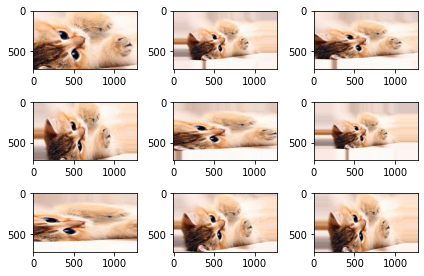

In [ ]:
datagen = ImageDataGenerator(zoom_range=0.6) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The image is randomly rotated clockwise a specified number of degrees from 0 to 360. It is likely to rotate pixels outside of the image frame, leaving areas of the frame with no pixel data, which need to be filled.

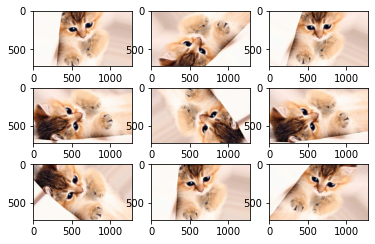

In [ ]:
datagen = ImageDataGenerator(rotation_range=300)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

**zca_epsilon** Epsilon for ZCA whitening. The default is 1e-6.

**zca_whitening** Boolean. Apply ZCA whitening

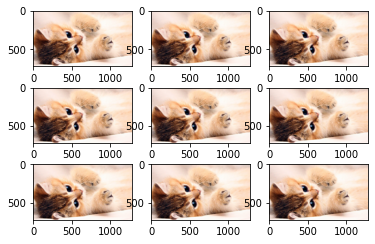

In [ ]:
datagen = ImageDataGenerator(zca_epsilon=1e-6)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

**shear_range** Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)

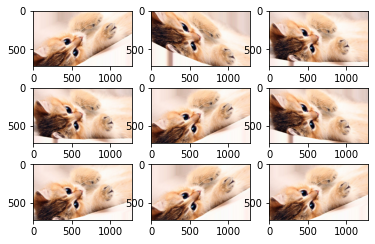

In [ ]:
datagen = ImageDataGenerator(shear_range=30)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

**rescale** rescaling factor.

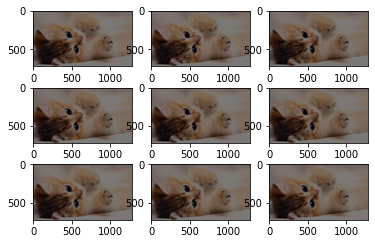

In [ ]:
datagen = ImageDataGenerator(rescale=125./255)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

the combination of these techniques allows us to increase the amount of data in the dataset to be used, in many jobs a data augmentation is used to increase the amount of training images and improve the precision of the job.

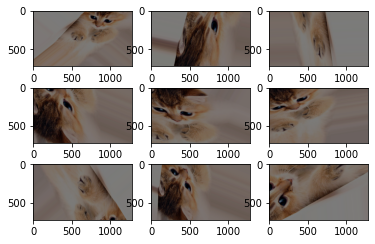

In [ ]:
datagen = ImageDataGenerator(
            rotation_range               = 300,
            width_shift_range            = [200,200],   
            height_shift_range           = [-100,200],   
            horizontal_flip              = True,   
            vertical_flip                = False,  
            zoom_range                   = 0.6,
            zca_epsilon                  =1e-6,
            shear_range                  =30,
            rescale                      =125./255)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

other combinations.
    
               featurewise_center: Boolean, set the mean of each element to zero of all data.
               samplewise_center **: Boolean, set the mean of each sample to zero
               featurewise_std_normaliza tion: Boolean, Divide the inputs by the standard deviation (std.) of the data set, based on the characteristics.
               samplewise_std_normalization: Boolean, divide each data by its std.

Now we consider words, the necessary work is not so simple given the inherent complexity of the language (we cannot replace each word by its synonym and even if we do, we run the risk that the meaning of the sentence changes completely. There are some libraries that we can help to carry out this task, we will begin by analyzing the following:

Text Attack

Google Trans

#Text Attack
It is a Python framework for adversary attacks, adversary training, and data augmentation in NLP. We will focus only on data augmentation.

In [ ]:
!pip install textattack

In [ ]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


2020-10-17 03:35:37 INFO: Downloading default packages for language: en (English)...
2020-10-17 03:36:52 INFO: Finished downloading models and saved to /root/stanza_resources.
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [ ]:
text = "“What is the you that you dreamed of? Who do you see in the mirror? I gotta say. Go on your path even if you live for a day. Do something, put away your weakness”"

## Text Attack provides us with four methods for data augmentation.

**WordNetAugmenter**

Augments the text by replacing it with synonyms from the WordNet thesaurus (thesaurus).

WordNet is a lexical database for English. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a different concept.
WordNet superficially resembles a thesaurus in that it groups words based on their meaning.
 


In [ ]:
aug = WordNetAugmenter();
aug.augment(text)

['“What is the you that you dreamed of? WHO do you see in the mirror? I gotta say. croak on your path even if you live for a day. Do something, place away your weakness”']

**Embedding Augmenter**

Augment text by transforming words with their inlays, with a constraint to ensure that their cosine similarity is at least 0.8.

In [ ]:
aug = EmbeddingAugmenter();
aug.augment(text)

['“What is the you that you dreamt of? Who do you see in the mirror? I ought say. Go on your path yet if you live for a day. Do something, put away your weakness”']

**CharSwapAugmenter**

Augment text by substituting, deleting, inserting, and swapping adjacent characters.

In [ ]:
aug = CharSwapAugmenter()
aug.augment(text)

['“What is the you that you dreamed of? Who do you see in the mirror? I gotta say. Go on your path evHen if you live for a day. Do something, puwt awamy your weakness”']

**EasyDataAugmenter**

This augments the text with a combination of Wordnet synonym replacement, word deletion, word order changes, and synonym insertions. All these 4 functionalities occur randomly. So we will get different results every time we run the code. This returns 4 augmented results, unlike the other methods.

In [ ]:
aug = EasyDataAugmenter()
aug.augment(text)

['“What is the you that you dreamed of? Who do you see in the mirror? ace gotta say. Go on your path even if you live for a day. ut something, put off your weakness”',
 '“What is the stargaze you that you dreamed of? Who do you see in the mirror? I gotta say. Go on your path daydream even if you live for a day. Do something, put away your inwards weakness”',
 '“What is the you that you of? Who do you see in the mirror? I gotta say. Go on your path even you live a day. Do something, put away your weakness”',
 '“What is the you that you dreamed in? even do you see of the for? I gotta say. Go on your path Who if you live mirror a day. Do something, put away your weakness”']

**Googletrans** uses the Google Translate Ajax API for language detection and translation.

The key parameters for the ** translate () ** method are:



1. ** src **: source language. this parameter is optional as ** googletrans ** will detect it.
2. ** dest **: target language. Mandatory parameter.

1. ** text **: the text to be translated from the source language to the target language. Mandatory parameter.





 



When using this method what happens is a retranslation, we go from the original language to a target language and then we return to the original, during this backtranslation, there is a slight change in the sentence between the original text and the backtranslated text, but the general meaning of the sentence is still preserved.

Some examples of languages:


* Afrikaans 'af'

* Chinese (simplified) 'zh-CN or zh'

* Esperanto 'eo'

* Japanese 'ha'
* Latin 'la'


*   Spanish people'


* Turkmen 'tk'


* Yiddish 'yi'

* Zulu 'zu'

In [ ]:
!pip install googletrans

     |████████████████████████████████| 61kB 3.0MB/s 
     |████████████████████████████████| 972kB 9.4MB/s 
     |████████████████████████████████| 51kB 3.4MB/s 
     |████████████████████████████████| 61kB 5.4MB/s 
     |████████████████████████████████| 71kB 5.8MB/s 
     |████████████████████████████████| 102kB 5.3MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=8f9cba766bcc1658e9fc3379d332832f982896519f2bb374f1ad73aa2e2aefa5
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=b1cec783fe82b0618259a32c548f447e13f0da9de8250b7b3313d23cd6ac3219
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [ ]:
from googletrans import Translator
Translator = Translator()

In [ ]:
origin_text = "“If you don’t work hard, their won’t be a good result”"
text_trans = translator.translate(text=origin_text, dest= 'zh-CN').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

“If you don’t work hard, their won’t be a good result”
“如果不努力，就不会有好的结果”
"If you don't work hard, there will be no good results"


In [ ]:
origin_text = "“If you don’t work hard, their won’t be a good result”"
text_trans = translator.translate(text=origin_text, dest='af').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

“If you don’t work hard, their won’t be a good result”
"As u nie hard werk nie, sal daar geen goeie resultaat wees nie"
"If you do not work hard, there will be no good result"


In [ ]:
origin_text = text = "“If you don’t work hard, their won’t be a good result”"
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

“If you don’t work hard, their won’t be a good result”
"Uma ungasebenzi kanzima, ngeke kube nomphumela omuhle"
"If you don't work hard, it won't be a good result."


In [ ]:
origin_text = "“If you don’t work hard, their won’t be a good result”"
text_trans = translator.translate(text=origin_text, dest='ja').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

“What is the you that you dreamed of? Who do you see in the mirror? I gotta say. Go on your path even if you live for a day. Do something, put away your weakness”
「あなたが夢見ていたあなたは何ですか？鏡の中に誰が見えますか？私は言わなければならない。あなたが一日生きていてもあなたの道を進んでください。何かをして、あなたの弱点を片付けなさい」
"What are you dreaming about? Who can you see in the mirror? I have to say. Go your way even if you live all day. Do something, Get rid of your weaknesses. "


In [ ]:
origin_text = "“If you don’t work hard, their won’t be a good result”"
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

“If you don’t work hard, their won’t be a good result”
"Uma ungasebenzi kanzima, ngeke kube nomphumela omuhle"
"If you don't work hard, it won't be a good result."
